# INTEGRATE -Generic Prior Model Generation Examples

This example demonstrates the different prior model generation functions 
available in the INTEGRATE module. The script creates multiple prior models
using different parameterizations and distributions:

1. **prior_model_layered()** - Variable number of layers with uniform or chi2 distribution
2. **prior_model_workbench()** - Workbench-style parameterization with variable layers  
3. **prior_model_workbench_direct()** - Direct workbench with fixed number of layers

Each function demonstrates different resistivity distributions and layer configurations
commonly used in electromagnetic geophysical inversions.

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
import os

# Check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)
hardcopy = True

print("="*60)
print("INTEGRATE - Prior Model Generation Examples")
print("="*60)

Notebook detected. Parallel processing is OK
INTEGRATE - Prior Model Generation Examples


## Configuration Parameters
Set the number of realizations and common parameters for all prior models

In [3]:
# Number of realizations to generate for each prior model
N = 500000  # Adjust this value as needed

# Common depth parameters  
z_max = 90      # Maximum depth (m)
dz = 1          # Depth discretization (m)

# Common resistivity range
RHO_min = 1     # Minimum resistivity (Ohm-m) 
RHO_max = 500   # Maximum resistivity (Ohm-m)

print(f"Configuration:")
print(f"- Number of realizations per model: {N:,}")
print(f"- Maximum depth: {z_max} m")
print(f"- Resistivity range: {RHO_min} - {RHO_max} Ohm-m")
print(f"- Depth discretization: {dz} m")

Configuration:
- Number of realizations per model: 500,000
- Maximum depth: 90 m
- Resistivity range: 1 - 500 Ohm-m
- Depth discretization: 1 m


## 1. prior_model_layered() Examples
Generate layered resistivity models with different layer number distributions and resistivity distributions

In [4]:
print(f"\n{'='*60}")
print("1. PRIOR_MODEL_LAYERED() EXAMPLES")
print(f"{'='*60}")

# ### 1a. Layered model with uniform layer distribution and log-uniform resistivity
print(f"\n1a. Layered model: uniform layers (3-6), log-uniform resistivity")
f_prior_layered_uniform = ig.prior_model_layered(
    N=N,
    lay_dist='uniform',         # Uniform distribution of layer numbers
    z_max=z_max,
    dz=dz,
    NLAY_min=3,                 # Minimum 3 layers
    NLAY_max=6,                 # Maximum 6 layers
    RHO_dist='log-uniform',     # Log-uniform resistivity distribution
    RHO_min=RHO_min,
    RHO_max=RHO_max,
    f_prior_h5='PRIOR_layered_uniform_log-uniform_N%d.h5' % N,
    save_sparse=False,
    showInfo=1
)

# ### 1b. Layered model with chi2 layer distribution and uniform resistivity  
print(f"\n1b. Layered model: chi2 layers (3-8), uniform resistivity")
f_prior_layered_chi2 = ig.prior_model_layered(
    N=N,
    lay_dist='chi2',            # Chi-square distribution of layer numbers
    z_max=z_max,
    dz=dz,
    NLAY_min=3,                 # Minimum 3 layers
    NLAY_max=8,                 # Maximum 8 layers  
    NLAY_deg=5,                 # Degrees of freedom for chi2 distribution
    RHO_dist='uniform',         # Uniform resistivity distribution
    RHO_min=RHO_min,
    RHO_max=RHO_max,
    f_prior_h5='PRIOR_layered_chi2_uniform_N%d.h5' % N,
    showInfo=1
)

# ### 1c. Layered model with normal resistivity distribution
print(f"\n1c. Layered model: uniform layers (4-7), normal resistivity")
f_prior_layered_normal = ig.prior_model_layered(
    N=N,
    lay_dist='uniform',
    z_max=z_max,
    dz=dz,
    NLAY_min=4,                 # Minimum 4 layers
    NLAY_max=7,                 # Maximum 7 layers
    RHO_dist='normal',          # Normal resistivity distribution
    RHO_MEAN=100,               # Mean resistivity
    RHO_std=50,                 # Standard deviation
    f_prior_h5='PRIOR_layered_uniform_normal_N%d.h5' % N,
    showInfo=1
)


1. PRIOR_MODEL_LAYERED() EXAMPLES

1a. Layered model: uniform layers (3-6), log-uniform resistivity


prior_layered:   0%|                                                                                                                         | 0/500000 [00:00<?, ?it/s]

prior_layered:  22%|███████████████████████                                                                                 | 110955/500000 [00:01<00:03, 110954.55it/s]

prior_layered:  44%|██████████████████████████████████████████████▏                                                         | 222269/500000 [00:02<00:02, 111165.37it/s]

prior_layered:  67%|█████████████████████████████████████████████████████████████████████▍                                  | 333632/500000 [00:03<00:01, 111255.55it/s]

prior_layered:  89%|████████████████████████████████████████████████████████████████████████████████████████████▋           | 445671/500000 [00:04<00:00, 111564.74it/s]

prior_model_layered: Saving prior model to PRIOR_layered_uniform_log-uniform_N500000.h5
File PRIOR_layered_uniform_log-uniform_N500000.h5 does not exist.



1b. Layered model: chi2 layers (3-8), uniform resistivity


prior_layered:   0%|                                                                                                                         | 0/500000 [00:00<?, ?it/s]

prior_layered:  23%|████████████████████████▏                                                                               | 116061/500000 [00:01<00:03, 116060.31it/s]

prior_layered:  47%|████████████████████████████████████████████████▍                                                       | 233125/500000 [00:02<00:02, 116650.57it/s]

prior_layered:  70%|█████████████████████████████████████████████████████████████████████████                               | 351206/500000 [00:03<00:01, 117303.67it/s]

prior_layered:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████▊      | 470015/500000 [00:04<00:00, 117897.76it/s]

prior_model_layered: Saving prior model to PRIOR_layered_chi2_uniform_N500000.h5
File PRIOR_layered_chi2_uniform_N500000.h5 does not exist.



1c. Layered model: uniform layers (4-7), normal resistivity


prior_layered:   0%|                                                                                                                         | 0/500000 [00:00<?, ?it/s]

prior_layered:  25%|█████████████████████████▊                                                                              | 124162/500000 [00:01<00:03, 124161.41it/s]

prior_layered:  50%|████████████████████████████████████████████████████                                                    | 250356/500000 [00:02<00:01, 125356.92it/s]

prior_layered:  75%|██████████████████████████████████████████████████████████████████████████████▍                         | 376942/500000 [00:03<00:00, 125917.65it/s]

prior_model_layered: Saving prior model to PRIOR_layered_uniform_normal_N500000.h5
File PRIOR_layered_uniform_normal_N500000.h5 does not exist.


## 2. prior_model_workbench() Examples
Generate workbench-style parameterized models with increasingly thick layers

In [5]:
print(f"\n{'='*60}")
print("2. PRIOR_MODEL_WORKBENCH() EXAMPLES")  
print(f"{'='*60}")


2. PRIOR_MODEL_WORKBENCH() EXAMPLES


In [6]:
print(f"\n2a. Workbench model: uniform layers (3-6), p=2 thickness increase")
f_prior_workbench_uniform = ig.prior_model_workbench(
    N=N,
    z1=0,                       # Starting depth
    z_max=z_max,
    dz=dz,
    lay_dist='uniform',         # Uniform distribution of layer numbers
    NLAY_min=3,
    NLAY_max=6,
    RHO_dist='log-uniform',
    RHO_min=RHO_min,
    RHO_max=RHO_max,
    f_prior_h5='PRIOR_workbench_uniform_p2_N%d.h5' % N,
    showInfo=1
)

#  ### 2b. Workbench model with chi2 layer distribution and higher power
print(f"\n2b. Workbench model: chi2 layers (2-5), p=3 thickness increase") 
f_prior_workbench_chi2 = ig.prior_model_workbench(
    N=N,
    p=3,                        # Higher power for more rapid thickness increase
    z1=0,
    z_max=z_max,
    dz=dz,
    #lay_dist='uniform',         # Uniform distribution of layer numbers
    lay_dist='chi2',            # Chi2 distribution of layer numbers
    NLAY_deg=4,                 # Degrees of freedom
    NLAY_min=2,
    NLAY_max=5,
    RHO_dist='log-uniform',
    RHO_min=RHO_min,
    RHO_max=RHO_max,
    f_prior_h5='PRIOR_workbench_chi2_p3_N%d.h5' % N,
    showInfo=1
)

# ### 2c. Workbench model with lognormal resistivity distribution
print(f"\n2c. Workbench model: uniform layers (3-5), lognormal resistivity")
f_prior_workbench_lognormal = ig.prior_model_workbench(
    N=N,
    p=2,
    z1=0,
    z_max=z_max,
    dz=dz, 
    lay_dist='uniform',
    NLAY_min=3,
    NLAY_max=5,
    RHO_dist='lognormal',       # Lognormal resistivity distribution
    RHO_mean=100,               # Mean for lognormal
    RHO_std=60,                 # Standard deviation for lognormal
    f_prior_h5='PRIOR_workbench_uniform_lognormal_N%d.h5' % N,
    showInfo=1
)


2a. Workbench model: uniform layers (3-6), p=2 thickness increase


prior_workbench:   0%|                                                                                                                       | 0/500000 [00:00<?, ?it/s]

prior_workbench:  15%|███████████████▍                                                                                        | 74205/500000 [00:01<00:05, 74204.06it/s]

prior_workbench:  30%|██████████████████████████████▋                                                                        | 148748/500000 [00:02<00:04, 74402.85it/s]

prior_workbench:  45%|██████████████████████████████████████████████                                                         | 223680/500000 [00:03<00:03, 74644.27it/s]

prior_workbench:  60%|█████████████████████████████████████████████████████████████▍                                         | 298325/500000 [00:04<00:02, 74500.63it/s]

prior_workbench:  75%|████████████████████████████████████████████████████████████████████████████▉                          | 373215/500000 [00:05<00:01, 74640.82it/s]

prior_workbench:  90%|████████████████████████████████████████████████████████████████████████████████████████████▎          | 447857/500000 [00:06<00:00, 74420.01it/s]

prior_model_workbench: Saving prior model to PRIOR_workbench_uniform_p2_N500000.h5
File PRIOR_workbench_uniform_p2_N500000.h5 does not exist.



2b. Workbench model: chi2 layers (2-5), p=3 thickness increase


prior_workbench:   0%|                                                                                                                       | 0/500000 [00:00<?, ?it/s]

prior_workbench:  15%|███████████████▏                                                                                        | 72780/500000 [00:01<00:05, 72778.77it/s]

prior_workbench:  29%|██████████████████████████████▏                                                                        | 146267/500000 [00:02<00:04, 73194.89it/s]

prior_workbench:  44%|█████████████████████████████████████████████▎                                                         | 219891/500000 [00:03<00:03, 73390.56it/s]

prior_workbench:  59%|████████████████████████████████████████████████████████████▍                                          | 293515/500000 [00:04<00:02, 73482.68it/s]

prior_workbench:  74%|███████████████████████████████████████████████████████████████████████████▊                           | 367729/500000 [00:05<00:01, 73746.22it/s]

prior_workbench:  88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 441476/500000 [00:06<00:00, 73626.07it/s]

prior_model_workbench: Saving prior model to PRIOR_workbench_chi2_p3_N500000.h5
File PRIOR_workbench_chi2_p3_N500000.h5 does not exist.



2c. Workbench model: uniform layers (3-5), lognormal resistivity


prior_workbench:   0%|                                                                                                                       | 0/500000 [00:00<?, ?it/s]

prior_workbench:  17%|█████████████████▍                                                                                      | 84066/500000 [00:01<00:04, 84065.48it/s]

prior_workbench:  34%|██████████████████████████████████▉                                                                    | 169414/500000 [00:02<00:03, 84819.58it/s]

prior_workbench:  51%|████████████████████████████████████████████████████▍                                                  | 254650/500000 [00:03<00:02, 85009.66it/s]

prior_workbench:  68%|█████████████████████████████████████████████████████████████████████▉                                 | 339660/500000 [00:04<00:01, 84092.47it/s]

prior_workbench:  85%|███████████████████████████████████████████████████████████████████████████████████████▎               | 423768/500000 [00:05<00:00, 84088.39it/s]

prior_model_workbench: Saving prior model to PRIOR_workbench_uniform_lognormal_N500000.h5
File PRIOR_workbench_uniform_lognormal_N500000.h5 does not exist.


## 3. prior_model_workbench_direct() Examples  
Generate workbench models with fixed number of layers

In [7]:
print(f"\n{'='*60}")
print("3. PRIOR_MODEL_WORKBENCH_DIRECT() EXAMPLES")
print(f"{'='*60}")

# ### 3a. Direct workbench with fixed 4 layers
print(f"\n3a. Direct workbench: fixed 4 layers, log-uniform resistivity")
f_prior_direct_4lay = ig.prior_model_workbench_direct(
    N=N,
    nlayers=4,                  # Fixed number of layers
    p=2,                        # Power parameter for thickness
    z1=0,
    z_max=z_max,
    RHO_dist='log-uniform',
    RHO_min=RHO_min,
    RHO_max=RHO_max,
    f_prior_h5='PRIOR_workbench_direct_4layers_N%d.h5' % N,
    showInfo=1
)

# ### 3b. Direct workbench with fixed 6 layers and chi2 resistivity
print(f"\n3b. Direct workbench: fixed 6 layers, chi2 resistivity")
f_prior_direct_6lay_chi2 = ig.prior_model_workbench_direct(
    N=N,
    nlayers=6,                  # Fixed number of layers
    p=2,
    z1=0,
    z_max=z_max,
    RHO_dist='chi2',            # Chi2 resistivity distribution
    chi2_deg=50,                # Degrees of freedom for chi2
    f_prior_h5='PRIOR_workbench_direct_6layers_chi2_N%d.h5' % N,
    showInfo=1
)

# ### 3c. Direct workbench with high-resolution layering
print(f"\n3c. Direct workbench: fixed 10 layers, high resolution") 
f_prior_direct_10lay = ig.prior_model_workbench_direct(
    N=N,
    nlayers=10,                 # High-resolution with 10 layers
    p=1.5,                      # Lower power for more gradual thickness increase
    z1=0,
    z_max=z_max,
    RHO_dist='log-uniform',
    RHO_min=RHO_min,
    RHO_max=RHO_max,
    f_prior_h5='PRIOR_workbench_direct_10layers_N%d.h5' % N,
    showInfo=1
)


3. PRIOR_MODEL_WORKBENCH_DIRECT() EXAMPLES

3a. Direct workbench: fixed 4 layers, log-uniform resistivity
prior_model_workbench_direct: Saving prior model to PRIOR_workbench_direct_4layers_N500000.h5
File PRIOR_workbench_direct_4layers_N500000.h5 does not exist.

3b. Direct workbench: fixed 6 layers, chi2 resistivity
prior_model_workbench_direct: Saving prior model to PRIOR_workbench_direct_6layers_chi2_N500000.h5
File PRIOR_workbench_direct_6layers_chi2_N500000.h5 does not exist.



3c. Direct workbench: fixed 10 layers, high resolution
prior_model_workbench_direct: Saving prior model to PRIOR_workbench_direct_10layers_N500000.h5
File PRIOR_workbench_direct_10layers_N500000.h5 does not exist.


## 4. Summary and Visualization
Display summary information and create comparison plots

In [8]:
print(f"\n{'='*60}")
print("4. SUMMARY OF GENERATED PRIOR MODELS")
print(f"{'='*60}")

# List all generated prior files
prior_files = [
    f_prior_layered_uniform,
    f_prior_layered_chi2,
    f_prior_layered_normal,
    f_prior_workbench_uniform,
    f_prior_workbench_chi2,
    f_prior_workbench_lognormal,
    f_prior_direct_4lay,
    f_prior_direct_6lay_chi2,
    f_prior_direct_10lay
]

print(f"\nGenerated {len(prior_files)} prior model files:")
for i, fname in enumerate(prior_files, 1):
    if os.path.exists(fname):
        file_size_mb = os.path.getsize(fname) / (1024*1024)
        print(f"  {i:2d}. {fname} ({file_size_mb:.1f} MB)")
    else:
        print(f"  {i:2d}. {fname} (FILE NOT FOUND)")


4. SUMMARY OF GENERATED PRIOR MODELS

Generated 9 prior model files:
   1. PRIOR_layered_uniform_log-uniform_N500000.h5 (65.9 MB)
   2. PRIOR_layered_chi2_uniform_N500000.h5 (81.3 MB)
   3. PRIOR_layered_uniform_normal_N500000.h5 (80.8 MB)
   4. PRIOR_workbench_uniform_p2_N500000.h5 (75.7 MB)
   5. PRIOR_workbench_chi2_p3_N500000.h5 (76.8 MB)
   6. PRIOR_workbench_uniform_lognormal_N500000.h5 (70.5 MB)
   7. PRIOR_workbench_direct_4layers_N500000.h5 (7.0 MB)
   8. PRIOR_workbench_direct_6layers_chi2_N500000.h5 (9.8 MB)
   9. PRIOR_workbench_direct_10layers_N500000.h5 (17.6 MB)


## 5. Plot Prior Statistics 
Generate comparison plots for selected prior models


5. PLOTTING PRIOR STATISTICS

Plotting statistics for: Layered: Uniform layers, Log-uniform ρ



Plotting statistics for: Workbench: Uniform layers, p=2



Plotting statistics for: Direct: 4 layers fixed



Plotting statistics for: Direct: 10 layers fixed


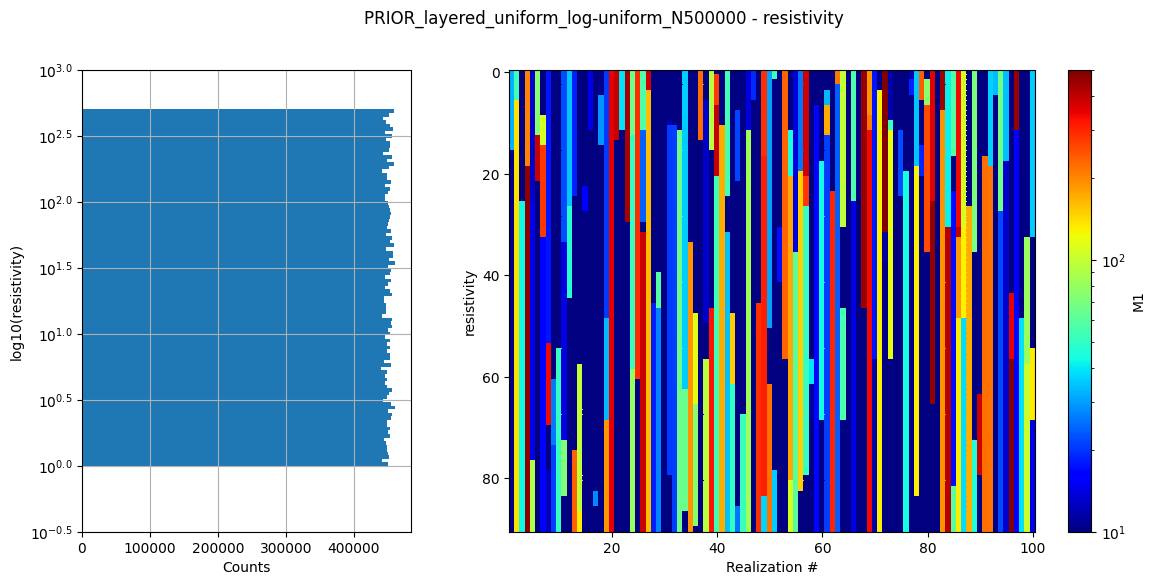

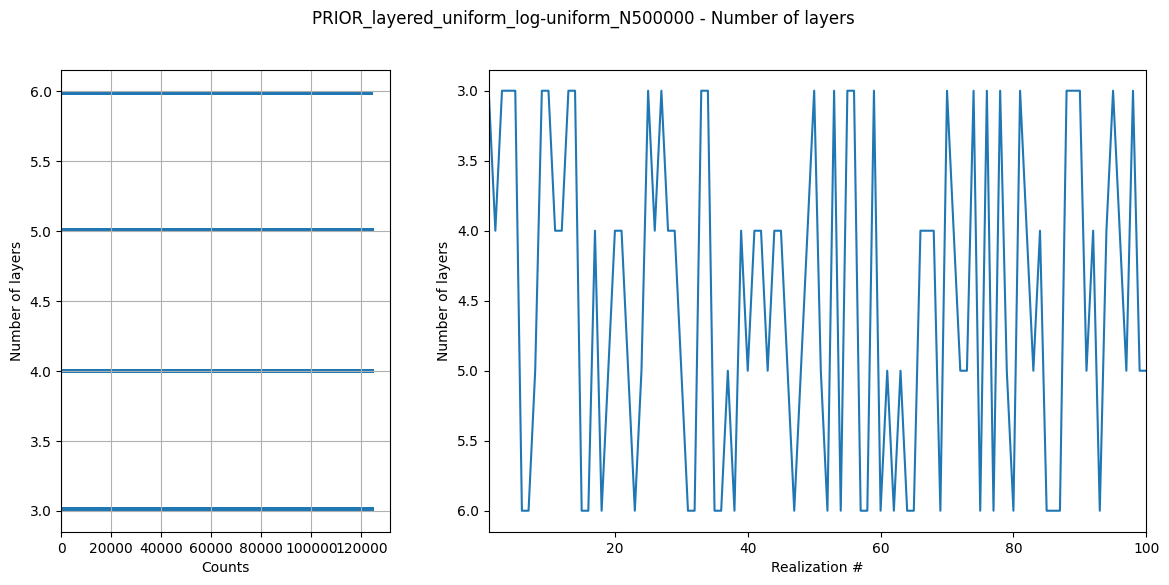

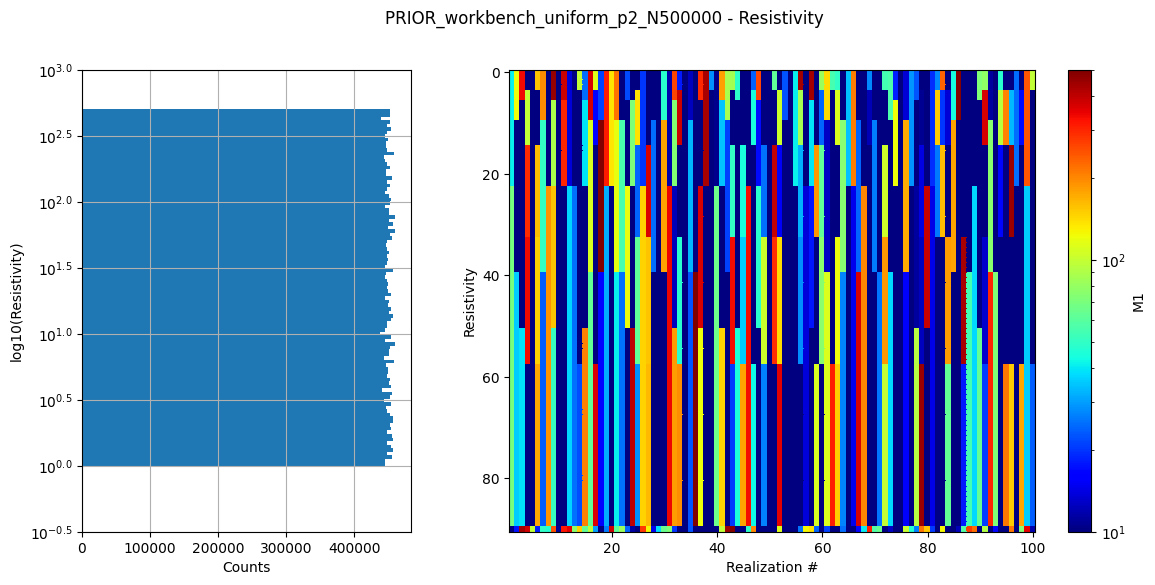

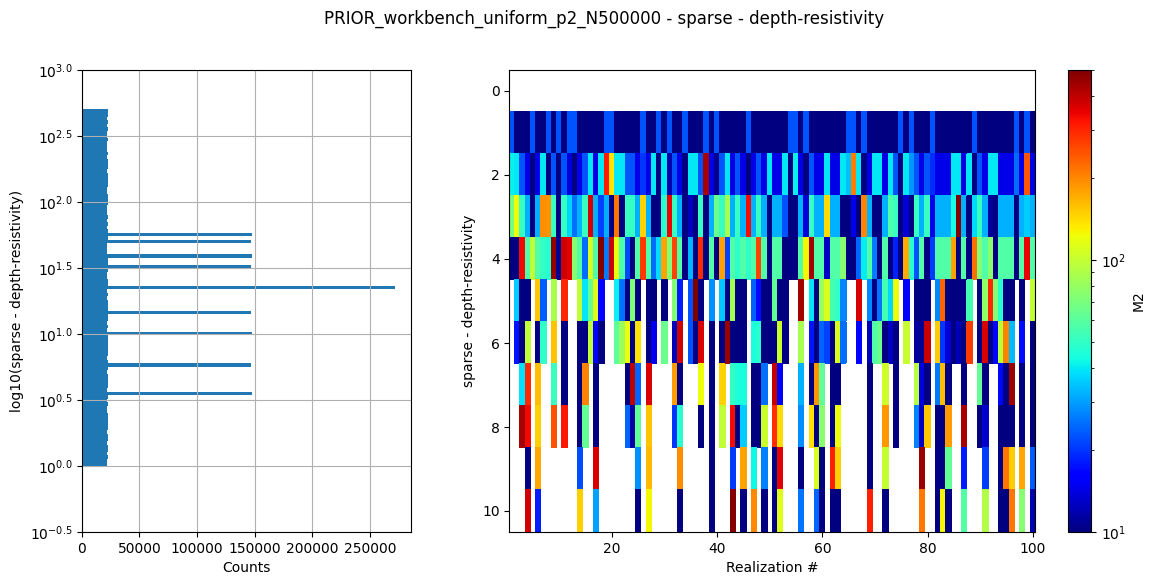

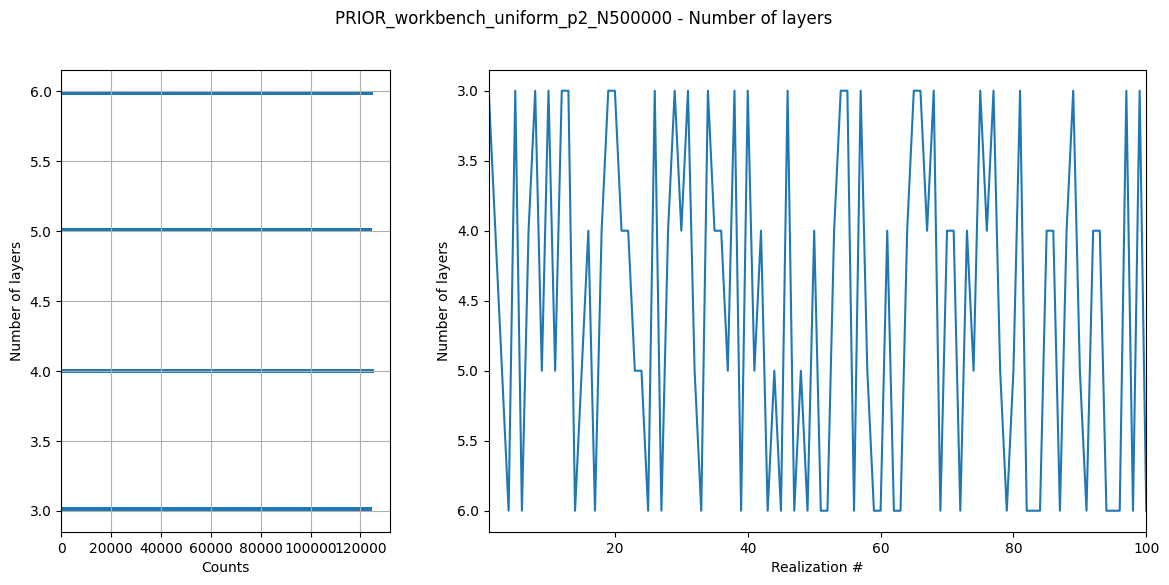

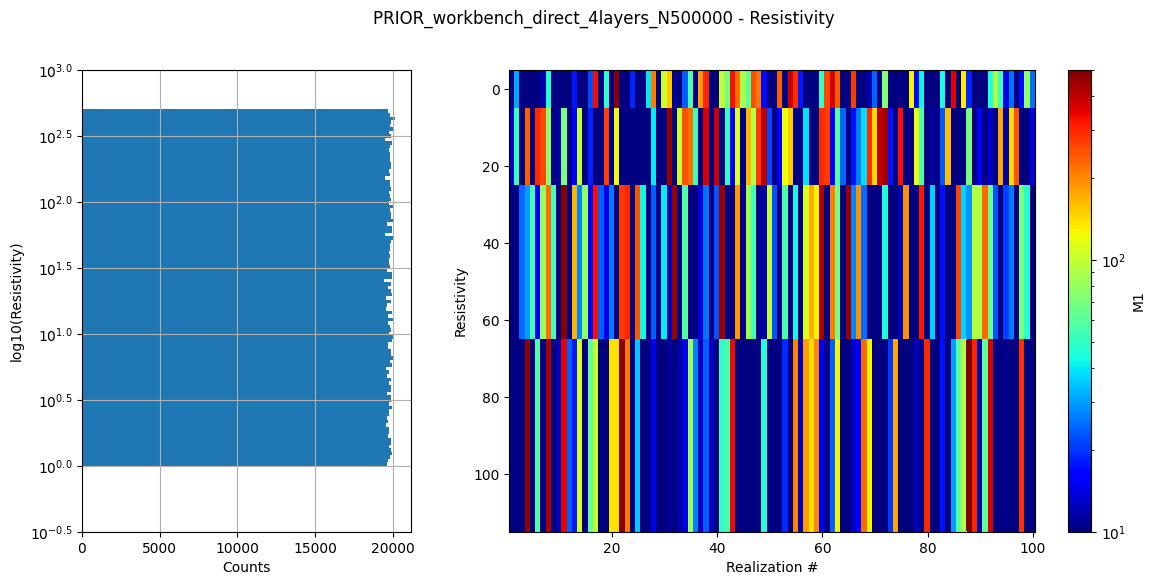

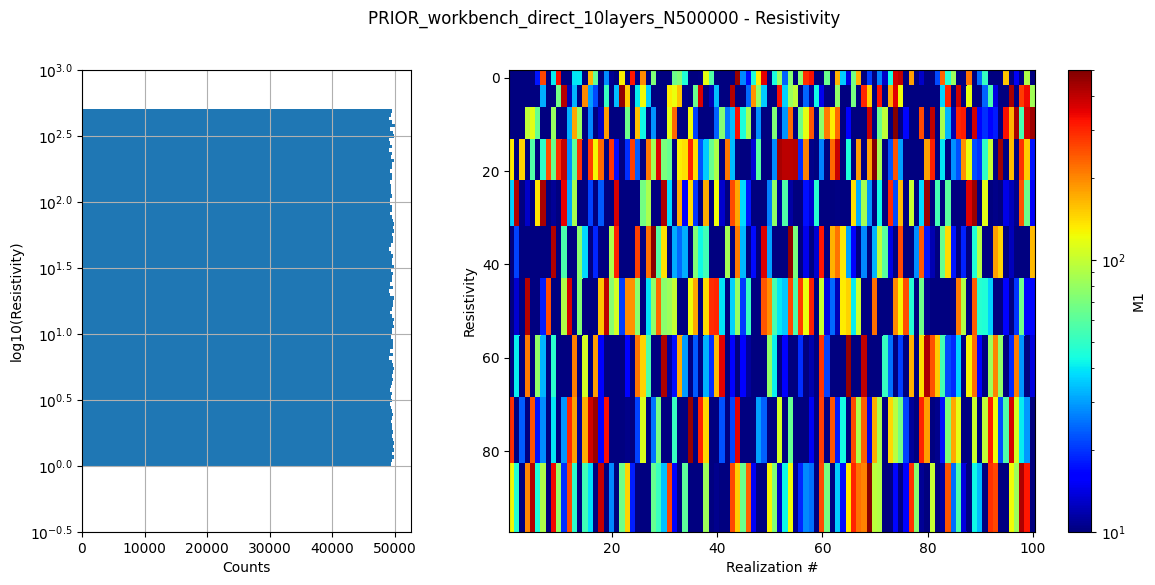

In [9]:
print(f"\n{'='*60}")
print("5. PLOTTING PRIOR STATISTICS")
print(f"{'='*60}")

# Plot statistics for a few representative examples
example_priors = [
    (f_prior_layered_uniform, "Layered: Uniform layers, Log-uniform ρ"),
    (f_prior_workbench_uniform, "Workbench: Uniform layers, p=2"),
    (f_prior_direct_4lay, "Direct: 4 layers fixed"),
    (f_prior_direct_10lay, "Direct: 10 layers fixed")
]

for fname, title in example_priors:
    if os.path.exists(fname):
        print(f"\nPlotting statistics for: {title}")
        try:
            fig = ig.plot_prior_stats(fname)
            if fig is not None and hardcopy:
                plot_name = fname.replace('.h5', '_stats.png')
                plt.savefig(plot_name, dpi=150, bbox_inches='tight')
                print(f"  Saved plot: {plot_name}")
        except Exception as e:
            print(f"  Error plotting {fname}: {e}")

In [10]:
print(f"\n{'='*60}")
print("SCRIPT COMPLETED SUCCESSFULLY")
print(f"{'='*60}")
print(f"\nGenerated {len(prior_files)} INTEGRATE prior model files:")
print("- Different layer parameterizations (layered, workbench, direct)")  
print("- Various resistivity distributions (log-uniform, uniform, normal, lognormal, chi2)")
print("- Different layer number distributions (uniform, chi2)")
print("- Range of model complexities (2-10 layers)")
print(f"\nAll files contain {N:,} realizations and are ready for:")
print("- Forward modeling with prior_data_gaaem()")
print("- Probabilistic inversion with integrate_rejection()")
print("- Model analysis and visualization")


SCRIPT COMPLETED SUCCESSFULLY

Generated 9 INTEGRATE prior model files:
- Different layer parameterizations (layered, workbench, direct)
- Various resistivity distributions (log-uniform, uniform, normal, lognormal, chi2)
- Different layer number distributions (uniform, chi2)
- Range of model complexities (2-10 layers)

All files contain 500,000 realizations and are ready for:
- Forward modeling with prior_data_gaaem()
- Probabilistic inversion with integrate_rejection()
- Model analysis and visualization
